In [6]:
import mshr
from dolfin import *
import dolfin as dl

In [7]:
from matplotlib import pyplot as plt


def poisson_solver(mesh, A, f):
    V = FunctionSpace(mesh, 'CG', 2)
    u_trial = TrialFunction(V)
    v_test = TestFunction(V)
    stiffness_form = inner(A * grad(u_trial), grad(v_test)) * dl.dx
    rhs_form = f * v_test * dl.dx
    bc = DirichletBC(V, Expression('0', degree=3), lambda x, on_bd: on_bd)
    u = Function(V)
    solve(stiffness_form == rhs_form, u, bc)

    return u

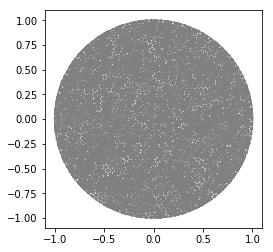

In [8]:
mesh = mshr.generate_mesh(mshr.Circle(Point(0., 0.), 1.), 40)
plot(mesh)

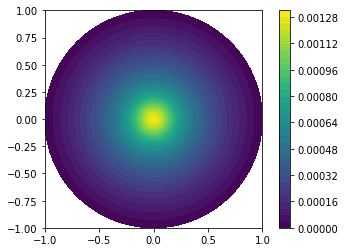

In [10]:
A1 = Constant(((10., 0.), (0., 10.)))
f = Expression('exp(-100*(pow(x[0], 2)+pow(x[1], 2)))', degree=5)
u1 = poisson_solver(mesh, A1, f)
c = plot(u1)
plt.colorbar(c)

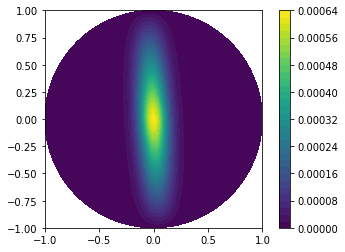

In [11]:
A2 = Constant(((1., -5.), (-5., 100.)))
f = Expression('exp(-100*(pow(x[0], 2)+pow(x[1], 2)))', degree=5)
u2 = poisson_solver(mesh, A2, f)
c = plot(u2)
plt.colorbar(c)